In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import dataset
ds=pd.read_csv('Position_salaries.csv')
ds.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [36]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [37]:
x=ds.iloc[:,[1]].values
y=ds.iloc[:,2].values
x,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000], dtype=int64))

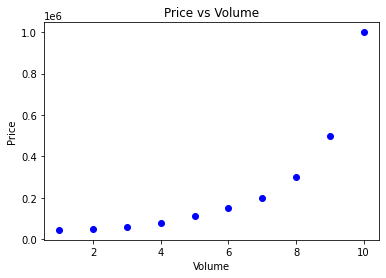

In [38]:
plt.scatter(x,y,color='blue') # plot the points
plt.title('Price vs Volume')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()

In [39]:
#Fitting polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg= PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(x)
print(x_poly)

regressor=LinearRegression()
regressor.fit(x_poly,y)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


LinearRegression()

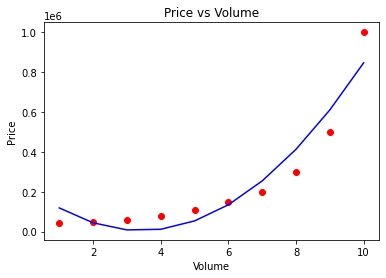

In [40]:
#visualizing the result
plt.scatter(x,y,color='red')
plt.plot(x, regressor.predict(x_poly), color='blue')
plt.title('Price vs Volume')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()

In [41]:
##visualizing the regression result(for higher resolution and smoother curve) 
x_grid = np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape((len(x_grid),1))

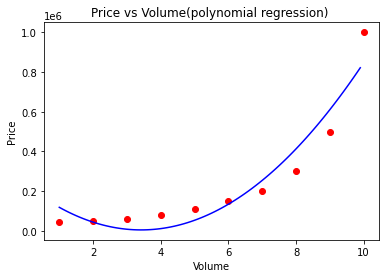

In [42]:
plt.scatter(x,y,color='red')
plt.plot(x_grid, regressor.predict(poly_reg.fit_transform(x_grid)), color='blue')
plt.title('Price vs Volume(polynomial regression) ')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()

In [43]:
y_predict=regressor.predict(poly_reg.fit_transform([[2.5]]))
print(y_predict)

[21437.5]
